w:  [0.90230696 0.64821811]
a:  -1.391980476255765
support_vectors_:  [[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
clf.coef_:  [[0.90230696 0.64821811]]


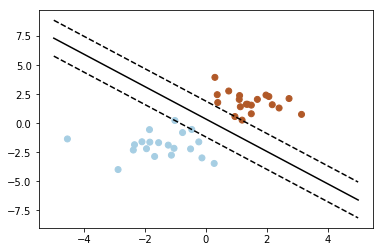

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl
from sklearn import svm

np.random.seed(0)  # 值固定，每次随机结果不变
# 2组20个二维的随机数，20个0，20个1的y  （20，2）20行2列
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# 训练
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)


w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0] / w[1])  # 点斜式 平分的线


b = clf.support_vectors_[0]
yy_down = a* xx +(b[1] - a*b[0])
b = clf.support_vectors_[-1]
yy_up = a* xx +(b[1] - a*b[0])  # 两条虚线

print( "w: ", w)
print("a: ", a)
print("support_vectors_: ", clf.support_vectors_)
print("clf.coef_: ", clf.coef_)

# plot the line, the points, and the nearest vectors to the plane
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()

In [4]:
# -*- coding: utf-8 -*-
from sklearn import svm

# 数据
x = [[2, 0], [1, 1], [2, 3]]
# 标签
y = [0, 0, 1]
# 线性可分的svm分类器，用线性的核函数
clf = svm.SVC(kernel='linear')
# 训练
clf.fit(x, y)
print(clf)

# 获得支持向量
print(clf.support_vectors_)

# 获得支持向量点在原数据中的下标
print(clf.support_)

# 获得每个类支持向量的个数
print(clf.n_support_)

# 预测
print(clf.predict([[2, 0]]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[[1. 1.]
 [2. 3.]]
[1 2]
[1 1]
[0]


In [2]:
import pandas as pd
data = pd.read_csv("KaggleCredit2.csv",index_col= 0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.shape

(150000, 11)

In [7]:
#3.看一下每个特征中都有多少个空值
data.isnull().sum(axis=0)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [8]:
#4.去除空值
data.dropna(inplace=True)
data.shape

(120269, 11)

In [9]:
#5.特征标准化
from sklearn.preprocessing import StandardScaler
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [15]:
#6.对特征列进行标准化
cols = data.columns[1:]
ss = StandardScaler()
data[cols] = ss.fit_transform(data[cols])
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,-0.019973,-0.435985,0.462455,-0.060775,0.170305,0.819965,-0.061157,4.303154,-0.054477,0.999810
2,0,-0.019229,-0.782566,-0.109101,-0.062380,-0.282957,-0.919901,-0.061157,-0.917557,-0.054477,0.129023
3,0,-0.020393,-0.921199,0.176677,-0.062467,-0.252229,-1.306537,0.227422,-0.917557,-0.054477,-0.741765
4,0,-0.022044,-1.475729,-0.109101,-0.062582,-0.234293,-0.726582,-0.061157,-0.917557,-0.054477,-0.741765
5,0,-0.019424,-0.158720,0.176677,-0.062609,3.956851,-0.339945,-0.061157,-0.047438,-0.054477,-0.741765
6,0,-0.022124,1.574187,-0.109101,-0.061782,-0.220390,-1.113219,-0.061157,-0.047438,-0.054477,0.129023
8,0,-0.020018,-0.851883,-0.109101,-0.062173,-0.220390,-0.146627,-0.061157,-0.917557,-0.054477,-0.741765
10,0,-0.022217,0.395810,-0.109101,-0.061239,1.182776,0.046691,-0.061157,2.562917,-0.054477,0.999810
11,0,-0.020447,-1.475729,-0.109101,-0.061938,-0.289908,-0.726582,-0.061157,-0.917557,-0.054477,-0.741765
12,0,-0.022880,-0.020087,-0.109101,-0.061415,-0.011764,-0.339945,-0.061157,0.822680,-0.054477,0.999810


In [16]:
#7.标签列
y = data['SeriousDlqin2yrs']
# 特征列
X = data.drop('SeriousDlqin2yrs', axis=1)

In [17]:
#8.是接下来看一下0和1分别有多少个样本
y.value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

In [18]:
#9.进行数据切分，测试集占比30%，生成随机数的种子是0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 ,random_state = 0)

In [20]:
#10.训练集中特征的形状，列数为10，说明正确
X_train.shape

(84188, 10)

In [21]:
#11.测试集中特征的形状
X_test.shape

(36081, 10)

In [24]:
#12.训练集中label的形状
y_train.shape

(84188,)

In [25]:
# 测试集中label的形状
y_test.shape


(36081,)

In [26]:
#13.构建SVM模型
from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)

In [27]:
#14.上边的代码跑了一遍，时间太长了，看来用所有特征进行训练不是很理想的选择。所以我们先找出对结果影响最大的特征，然后利用这个特征来跑一遍SVM。接下来，我们利用这份数据构建一个logistic regression 模型，然后得到每个特征的权重值，挑选权重最大的特征进行svm训练。
#这里使用logistic regression 模型
from sklearn.linear_model import LogisticRegression
# 构建一个逻辑回归的分类器。penalty是正则化的类别，L1正则化还是L2正则化。C是正则化参数的倒数，这里C是1000，
# 即正则化参数是0.001.
lr = LogisticRegression(penalty='l2',C = 1000,random_state = 0)
lr.fit(X_train,y_train)
# 模型的系数（权重值）
lr.coef_
# 查看一下每个特征的权重
pd.DataFrame({'columns':list(X_train.columns),"coef":list(lr.coef_.T)})
# 可以看出第2行“NumberOfTime30-59DaysPastDueNotWorse”和第6行“NumberRealEstateLoansOrLines”，
# 第8行“NumberOfTime60-89DaysPastDueNotWorse”的系数比较大，说明对结果的影响比较大

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,columns,coef
0,RevolvingUtilizationOfUnsecuredLines,[-0.012788245192822283]
1,age,[-0.3730730014177305]
2,NumberOfTime30-59DaysPastDueNotWorse,[1.7437498166814323]
3,DebtRatio,[-0.06477439359508501]
4,MonthlyIncome,[-0.5796691856961754]
5,NumberOfOpenCreditLinesAndLoans,[-0.028119924335848735]
6,NumberOfTimes90DaysLate,[1.4512032353151356]
7,NumberRealEstateLoansOrLines,[0.10118453117466834]
8,NumberOfTime60-89DaysPastDueNotWorse,[-3.0345822722228553]
9,NumberOfDependents,[0.10550892982606201]


In [30]:
#15.重新训练SVM模型
# 观察上边逻辑回归的结果可以看出，有一项特征“NumberOfTime60-89DaysPastDueNotWorse”的系数最大，说明对结果
# 的影响最为明显，因此在这里尝试用这一项特征作为训练集的特征输入进行SVM分类
svm = SVC()
svm.fit(X_train[['NumberOfTime60-89DaysPastDueNotWorse']], y_train)

y_pred_svm = svm.predict(X_test[['NumberOfTime60-89DaysPastDueNotWorse']])
y_pred_svm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# 在测试集上使得准确度93%
svm.score(X_test[['NumberOfTime60-89DaysPastDueNotWorse']], y_test)

0.9303788697652504